## FOR COMP90024 ASSIGNMENT 2
### BY TEAM 45:
    - William Chen 1400081
    - Petr Andreev 1375858
    - Rafsan Al Mamun 1407776
    - Ojaswi Dheer 1447227

# Air Quality Analysis in Victoria
---------------------------------
This notebook explores air quality data collected from various monitoring stations in Victoria. The dataset includes hourly average measurements of air quality parameters. The objective of this analysis is to gain insights into the temporal trends, spatial variations, and potential impacts of air pollution on public health in Victoria.

## Import Necessary Libraries:
----------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Load the Dataset:
--------------------

### Dataset Description

The dataset used in this analysis contains hourly average measurements of air quality parameters from various monitoring stations in Victoria. The dataset is sourced from EPA and includes the following columns:

- date: Date of observation
- time: Time of observation
- location_name: Name of the monitoring station
- latitude: Latitude coordinates of the monitoring station
- longitude: Longitude coordinates of the monitoring station
- value: Value of the observed air quality parameter
- parameter_name: Name of the observed air quality parameter

The objective of this analysis is to explore the relationship between air quality parameters and potential impacts on public health, particularly focusing on parameters such as CO (Carbon Monoxide), PM10 (Particulate Matter with diameter less than 10 micrometers), PM2.5 (Particulate Matter with diameter less than 2.5 micrometers), O3 (Ozone), and SO2 (Sulfur Dioxide). These parameters are known to have significant implications for air quality and human health.

Before proceeding with the analysis, we will load the dataset.


In [2]:
# Set display options for pandas DataFrame
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width

In [3]:
# Load the dataset
data = pd.read_excel('../data/2022_All_sites_air_quality_hourly_avg.xlsx', sheet_name='AllData', usecols='A:G')

# Filter the DataFrame to select only specific parameter names
selected_parameters = ['CO', 'PM10', 'PM2.5', 'O3', 'SO2']
filtered_data = data[data['parameter_name'].isin(selected_parameters)]

## Data Preprocessing:
-------------------

Before delving into detailed analysis, it's crucial to preprocess the dataset to ensure its quality and suitability for further exploration:

1. Data Conversion: Convert the 'date' column to datetime format to facilitate temporal analysis.
2. Filtering: Apply filters to select specific air quality parameters of interest for focused analysis.

By performing these preprocessing steps, we can streamline the data and focus our analysis on the relevant air quality parameters, setting the foundation for insightful exploration.


In [4]:
# Reset the index
filtered_data.reset_index(drop=True, inplace=True)

# Convert 'date' column to datetime data type
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract only the date portion from the datetime column
filtered_data['date'] = filtered_data['date'].dt.date

/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_20436/1248701647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])
/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_20436/1248701647.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = filtered_data['date'].dt.date


In [5]:
# Display the first few rows of the filtered DataFrame
print(filtered_data.head())

         date      time location_name   latitude   longitude   value parameter_name
0  2021-12-31  23:00:00  Morwell East -38.229393  146.424454   0.356             CO
1  2021-12-31  23:00:00   Mooroolbark -37.774967  145.328500  49.150           PM10
2  2021-12-31  23:00:00     Traralgon -38.194282  146.531464  27.504           PM10
3  2021-12-31  23:00:00     Footscray -37.803709  144.869342  33.061           PM10
4  2021-12-31  23:00:00  Morwell East -38.229393  146.424454   3.327          PM2.5


## Data Examination:
-----------------

Before conducting detailed analysis, it's essential to perform initial checks and preparations on the dataset:

1. Summary Statistics: Compute summary statistics to understand the distribution and central tendencies of the data.

2. Missing Values: Check for any missing values in the dataset and handle them appropriately.

Let's proceed with examining the data to ensure its quality and suitability for analysis.


### Summary Statistics:
-----------------
By examining the summary statistics from various angles and considering their implications in the broader context of air quality management and public health, we can uncover valuable insights and inform evidence-based decision-making.

In [6]:
# Compute summary statistics for each parameter in 'parameter_name'
parameter_summary_stats = filtered_data.groupby(['parameter_name'])['value'].describe()

# Display summary statistics for each parameter
print("Summary Statistics by Parameter:")
print(parameter_summary_stats)

Summary Statistics by Parameter:
                  count       mean        std     min    25%     50%      75%      max
parameter_name                                                                        
CO              43966.0   0.167876   0.128603  -0.589  0.095   0.144   0.2060    1.912
O3              66467.0  16.296012   9.242939  -0.971  9.937  16.684  22.4985   66.943
PM10            56597.0  16.437867  11.658281 -19.612  9.208  13.903  20.7580  416.870
PM2.5           81045.0   5.775832   5.362307 -42.107  2.466   4.900   8.0410   96.918
SO2             49353.0   0.434215   1.719208  -5.458 -0.070   0.280   0.6780  115.233


### Insights from Summary Statistics:

1. Presence of Negative Values:
   The summary statistics reveal the presence of negative values for certain air quality parameters (e.g., CO, O3, PM10, PM2.5, SO2), indicating potential measurement errors or anomalies that require further investigation and data cleaning to ensure data quality.

2. Wide Range of Values:
   The wide range of values observed for each parameter suggests significant variability in air quality across different observations. This variability could be influenced by factors such as location, time of day, weather conditions, and human activities, highlighting the complex nature of air quality dynamics.

3. Extreme Values:
   Some parameters exhibit extreme maximum values (e.g., PM10, PM2.5, SO2), indicating the presence of outliers or highly polluted conditions in certain instances.

4. Differences in Central Tendencies:
   Notable differences in the central tendencies (mean, median) of air quality parameters indicate variations in data distribution. For example, a right-skewed distribution is observed for PM2.5 concentrations, with some high-value outliers influencing the mean.

5. Standard Deviation and Variability:
   Parameters with higher standard deviations (e.g., PM10, PM2.5) exhibit greater variability in concentrations, suggesting heterogeneous spatial and temporal patterns in air quality. This variability underscores the importance of considering local factors and temporal trends in air quality management efforts.

6. Comparative Analysis and Health Implications:
   Comparative analysis of summary statistics across parameters highlights differences in emission sources, atmospheric processes, and regional variability for various pollutants. Parameters exceeding regulatory limits or health guidelines may pose increased health risks to exposed populations, emphasizing the importance of air quality monitoring and mitigation measures.

### Missing Values:
--------------------
Detect and remove missing values for a more comprehensive analysis.

In [7]:
# Check for missing values
print("\nMissing values in the dataset:")
print(filtered_data.isnull().sum())


Missing values in the dataset:
date              0
time              0
location_name     0
latitude          0
longitude         0
value             0
parameter_name    0
dtype: int64


## Exploratory Data Analysis (EDA) Insights:
-----------------------------------------

In this section, we delve deeper into the air quality dataset through various analytical approaches to gain valuable insights into air quality dynamics across different dimensions.

1. Distribution of Data Across Monitoring Locations:
   We start by visualizing the distribution of data across monitoring locations using a pie chart. This analysis provides an overview of the distribution of observations among different monitoring stations, offering insights into the spatial coverage of the dataset.

2. Comparative Analysis Across Locations:
   Next, we perform a comparative analysis to compare air quality parameters across different monitoring locations. Through box plots grouped by location and parameter, we explore spatial variations in air quality and investigate potential differences in pollution levels among monitoring stations.

3. Temporal Trend Analysis:
   Moving on, we conduct a temporal trend analysis to examine how air quality parameters vary over time. By calculating the monthly average of air quality parameters and visualizing the temporal trends, we aim to identify seasonal patterns and long-term trends in air quality dynamics.

These analytical approaches provide valuable insights into the spatial, temporal, and parameter-wise variations in air quality, contributing to a comprehensive understanding of air quality dynamics in the study area.


### Distribution of Data Across Monitoring Locations:
----------------------
Let's plot a pie chart to check which locations have the most data available. However, since there are 20 locations in the dataset, viewing all of them will cause overlaps. So, we will group the data into major locations.

Moreover, not every location has values for the same group of pollutants. Hence, we will focus on only PM2.5 which is thought to be the most dangerous for lung diseases.

/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_20436/3926427244.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'aggregated_location'] = filtered_data['location_name'].apply(aggregate_locations)


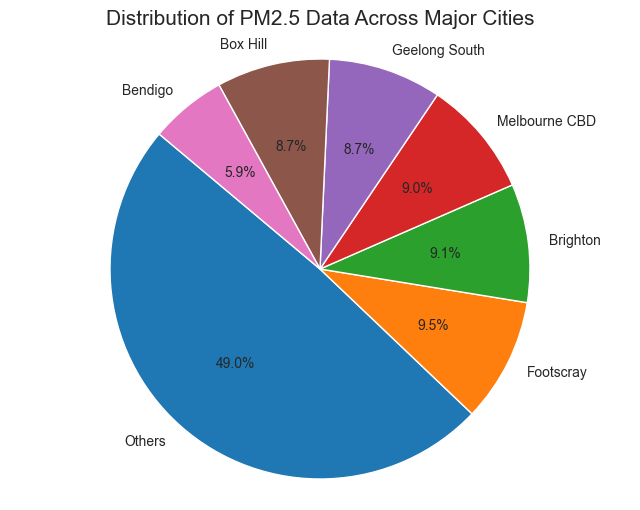

In [8]:
# Define the list of major cities
major_cities = ['Melbourne CBD', 'Geelong South', 'Bendigo', 'Dandenong', 'Footscray', 'Box Hill', 'Brighton']

# Define the aggregation function
def aggregate_locations(location):
    if location in major_cities:
        return location
    else:
        return 'Others'

# Apply the aggregation function to create a new column 'aggregated_location'
filtered_data.loc[:, 'aggregated_location'] = filtered_data['location_name'].apply(aggregate_locations)

# Calculate counts for each aggregated location
location_counts = filtered_data[filtered_data['parameter_name'] == 'PM2.5']['aggregated_location'].value_counts()

# Create a pie chart with aggregated locations
plt.figure(figsize=(8, 6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of PM2.5 Data Across Major Cities', fontsize=15, pad=10)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Insights from Data Distribution Chart:

1. Overall Picture:
The major cities account for about 51% of all the data related to PM2.5 particle in the dataset.

2. Urban Centers with Higher PM2.5 Levels:
Locations such as Melbourne CBD, Footscray, and Box Hill, with PM2.5 proportions ranging from 8.7% to 9.5%, likely correspond to urban centers or areas with higher population density and vehicular traffic. These areas typically experience elevated PM2.5 levels due to emissions from vehicles, industrial activities, and urban development.

3. Local Pollution Hotspots:
Locations like Brighton, known for their proximity to busy roads or industrial zones, have relatively higher proportions of PM2.5 data (9.1%). These areas may represent local pollution hotspots where emissions from transportation, industrial processes, or residential heating contribute to elevated PM2.5 levels.

### Distribution of PM2.5 Across Different Locations:
------------------------------
Next, let's have a look at the distribution of PM2.5 across the locations to explore spatial variations in air quality and investigate potential differences in pollution levels among monitoring stations.


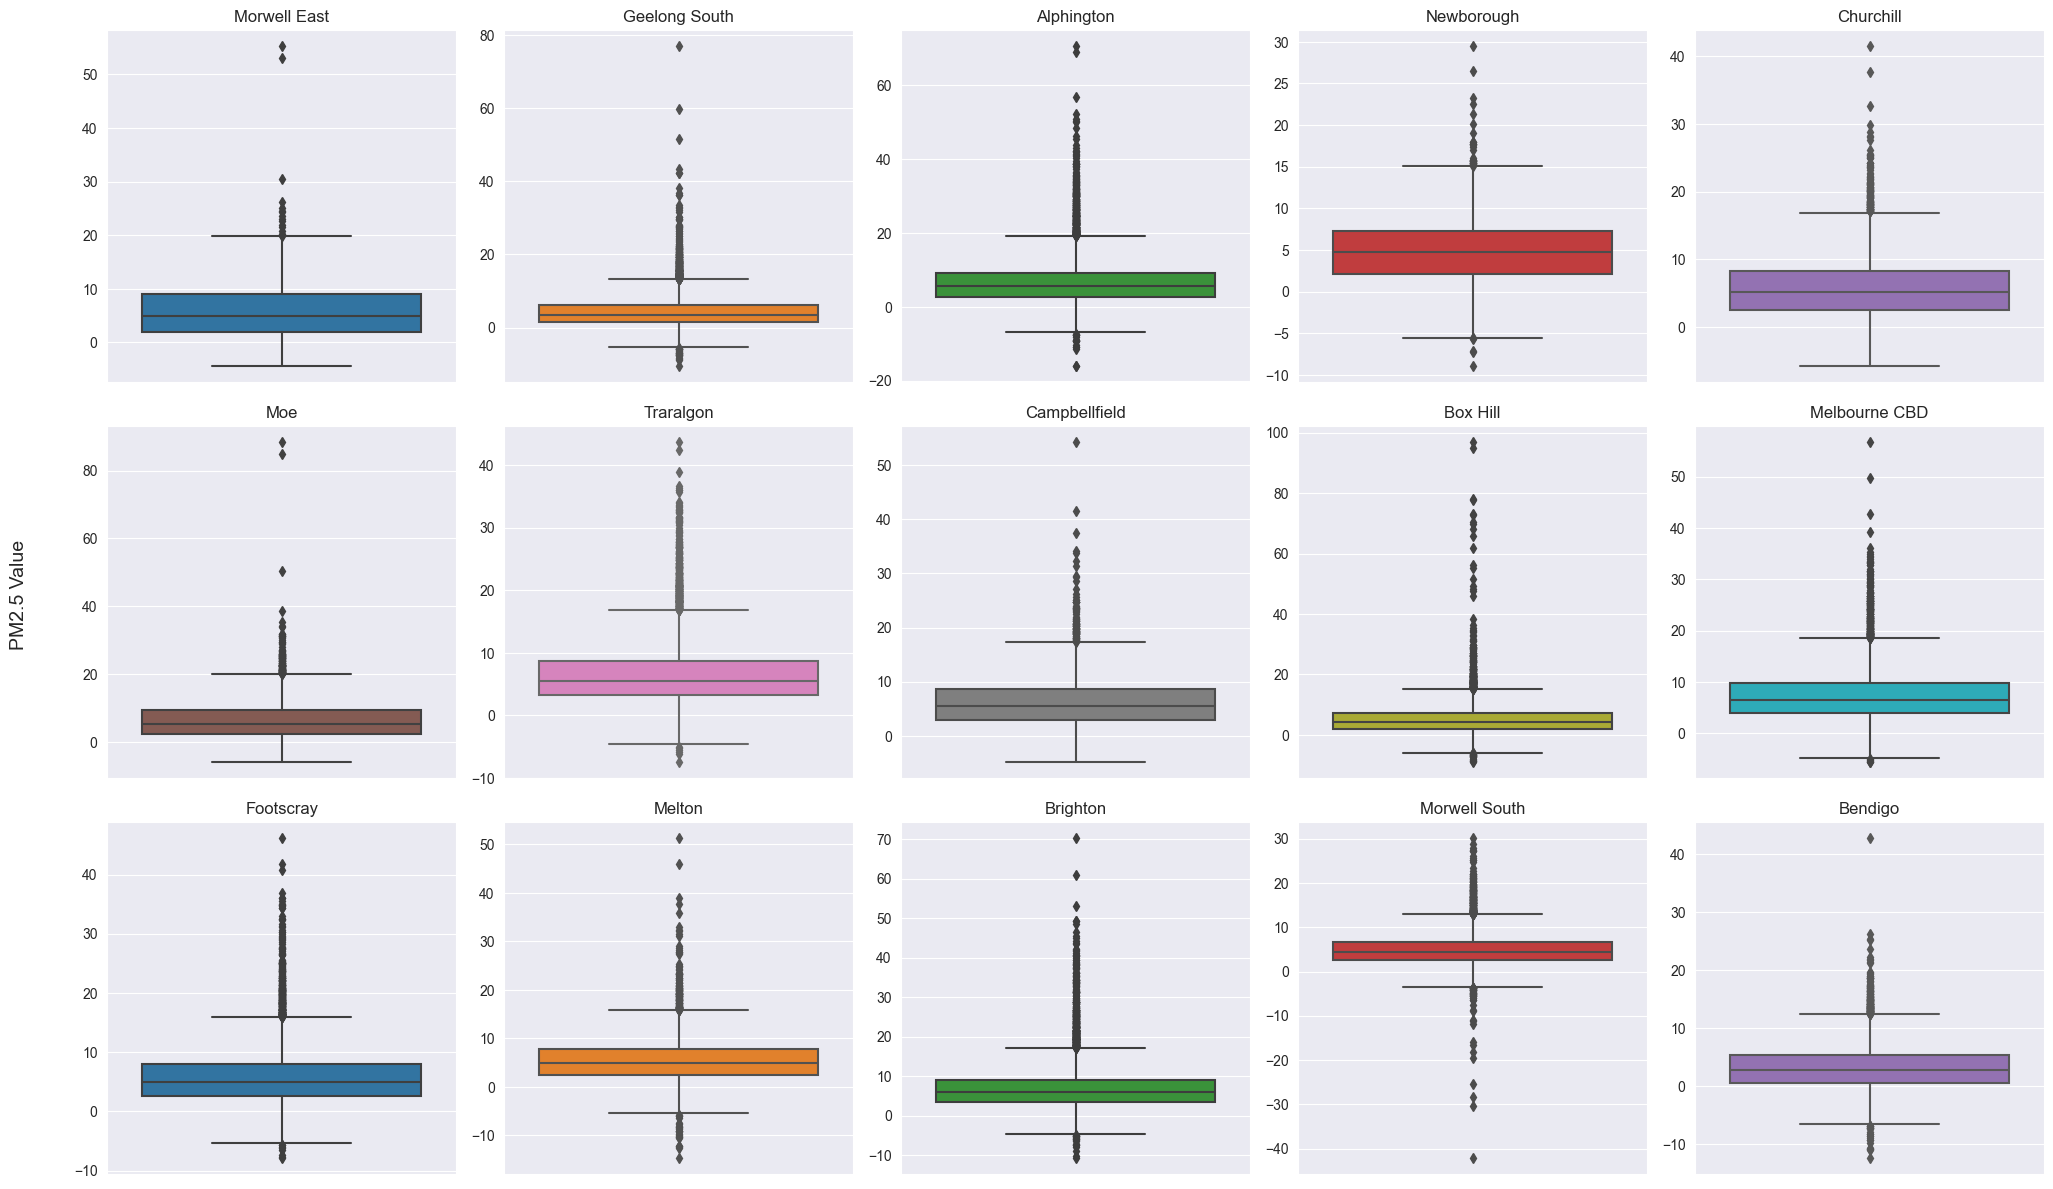

In [9]:
# Filter data for PM2.5 parameter
pm25_data = data[data['parameter_name'] == 'PM2.5']

# Get unique locations
unique_locations = pm25_data['location_name'].unique()

# Calculate number of rows and columns
num_locations = len(unique_locations)
num_rows = 3
num_cols = math.ceil(num_locations / num_rows)

# Define a custom color palette with enough distinct colors
palette = sns.color_palette('tab10', n_colors=num_locations)

# Create subplots for each location
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))

# Flatten axes array to handle both single and multiple subplots
axes = axes.flatten()

# Iterate over unique locations and create boxplots
for i, location in enumerate(unique_locations):
    sns.boxplot(y='value', data=pm25_data[pm25_data['location_name'] == location], ax=axes[i], color=palette[i])
    axes[i].set_title(f'{location}')
    axes[i].set_ylabel('')

# Add shared y-axis label
fig.text(-0.02, 0.5, 'PM2.5 Value', ha='center', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.show()

### Insights from PM2.5 Distribution Across Locations:

1. Variability:
There is considerable variability in PM2.5 levels across different locations, as indicated by the range of values and standard deviations. For instance, standard deviations range from approximately 3.70 µg/m³ to 6.36 µg/m³, suggesting differing levels of air pollution or local factors affecting PM2.5 concentrations.

2. Urban vs. Regional:
Urban areas like Melbourne CBD and Box Hill tend to have higher mean PM2.5 levels compared to regional areas like Bendigo and Traralgon. For example, Melbourne CBD exhibits a mean PM2.5 level of approximately 7.27 µg/m³, whereas Bendigo has a mean of about 3.32 µg/m³. This discrepancy suggests differing sources of pollution, including traffic congestion, industrial activities, and population density, influencing urban air quality.

3. Outliers:
Some locations exhibit outliers with extremely high or low PM2.5 values, as indicated by the minimum and maximum values. For instance, Box Hill shows a maximum PM2.5 value of approximately 96.92 µg/m³, while Morwell South has a minimum of around -42.11 µg/m³. These outliers may be indicative of unusual events or localized sources of pollution, warranting further investigation.

4. Temporal Patterns:
Although not explicitly shown here, examining temporal patterns in PM2.5 levels could provide additional insights. Seasonal variations, diurnal patterns, and trends over time may reveal underlying factors influencing air quality at different locations.


## Temporal Trend Analysis:
---------------------------
Next, we examine how PM2.5 levels vary over time to identify seasonal patterns and long-term trends in air quality dynamics. For that we will plot the hourly and monthly trends of PM2.5 across all locations.

/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_20436/1412226222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_data['hour'] = pm25_data['time'].apply(lambda x: x.hour)


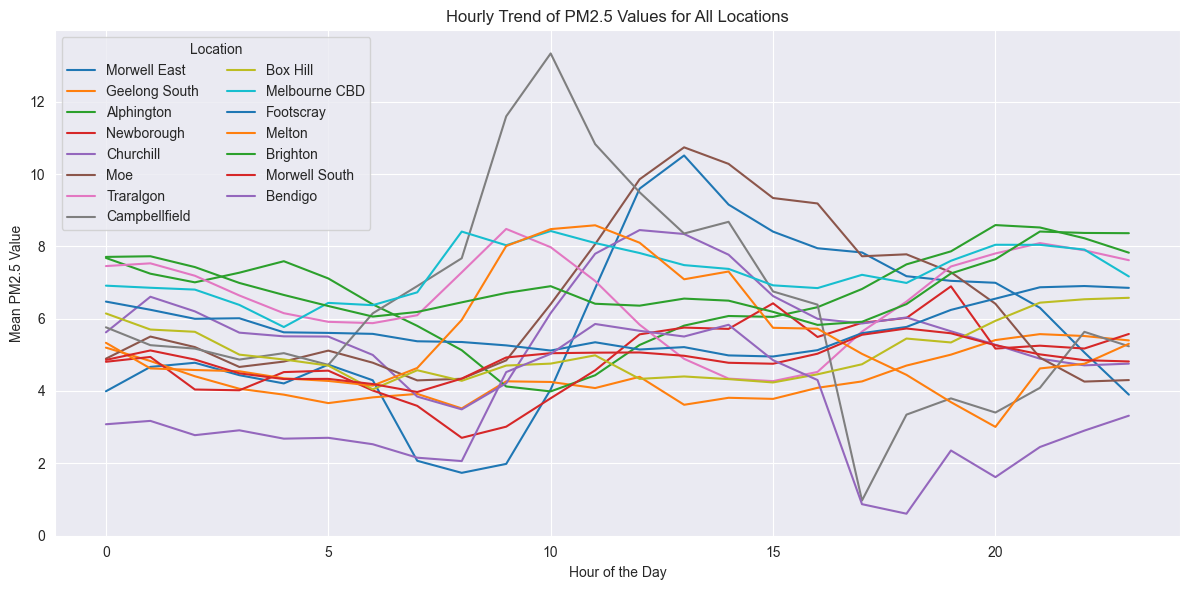

In [10]:
# Filter data for PM2.5
pm25_data = filtered_data[filtered_data['parameter_name'] == 'PM2.5']
pm25_data['hour'] = pm25_data['time'].apply(lambda x: x.hour)

# Plot hourly trend for all locations using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_data, x='hour', y='value', hue='location_name', errorbar=None, palette=palette)

plt.title('Hourly Trend of PM2.5 Values for All Locations')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean PM2.5 Value')
plt.legend(title='Location', loc='upper left', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights from Hourly Trend of PM2.5 Across All Locations:

1. Impact of Human Activity:
Higher PM2.5 levels are observed during the day, indicating the influence of peak human activity hours. This may be attributed to increased traffic congestion, industrial operations, and energy consumption (e.g., from heating, cooking, and air conditioning), which release particulate matter into the air.

2. Influence of Meteorological Factors:
The plot suggests a significant role of atmospheric conditions in PM2.5 levels, with elevated concentrations observed during daylight hours. Factors such as temperature, sunlight, and wind patterns contribute to the dispersion and accumulation of pollutants, leading to higher pollution levels during the day.

3. Patterns in Emissions:
Diurnal variations in PM2.5 levels are evident, suggesting different emission patterns throughout the day. Activities such as rush-hour traffic and industrial production may result in increased emissions during daytime hours, impacting air quality.

4. Regional and Local Variations:
Spatial and temporal variability in PM2.5 concentrations is observed, influenced by regional and local factors such as geographical location, urbanization, and proximity to emission sources. These factors contribute to the observed hourly trends in PM2.5 values across different locations.


/var/folders/7p/m7gs_hkn58qbs70h8pztg9480000gn/T/ipykernel_20436/2918318180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_data['month'] = pm25_data['date'].apply(lambda x: x.month)


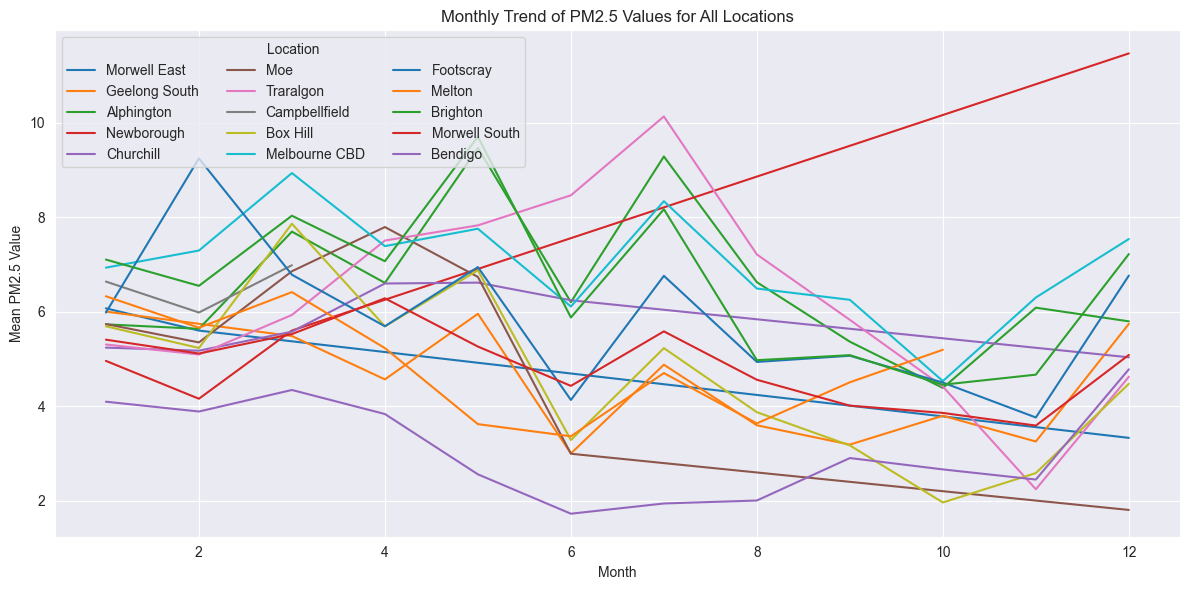

In [11]:
# Extract month from datetime
pm25_data['month'] = pm25_data['date'].apply(lambda x: x.month)

# Plot monthly trend for all locations using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_data, x='month', y='value', hue='location_name', errorbar=None, palette=palette)

plt.title('Monthly Trend of PM2.5 Values for All Locations')
plt.xlabel('Month')
plt.ylabel('Mean PM2.5 Value')
plt.legend(title='Location', loc='upper left', ncol=3)

plt.grid(True)
plt.tight_layout()
plt.show()


### Insights from Monthly Trend of PM2.5 Across All Locations:

1. Seasonal Transitions:
The observed increase in PM2.5 values between March and August may coincide with transitional seasons. Weather phenomena such as temperature inversions, where a layer of warm air traps cooler air close to the ground, can occur more frequently during autumn and winter in Victoria. Inversion events can lead to the stagnation of pollutants near the surface, resulting in higher PM2.5 levels, especially in urban areas with high emissions.

2. Wood Burning and Heating:
Cooler temperatures during autumn and winter may lead to increased use of wood heaters and fireplaces for residential heating purposes. Wood combustion emits particulate matter and other pollutants, which can contribute to higher PM2.5 concentrations, particularly in urban and rural areas.

3. Industrial and Urban Sources:
Autumn and winter months may see increased industrial and urban activities, which can emit pollutants such as PM2.5. Factors such as increased energy demand, industrial production, and vehicular traffic in response to cooler temperatures may contribute to higher PM2.5 concentrations during this period.

4. Always Increasing Trend of Newborough:
Coal-fired power plants like Yallourn can be significant sources of particulate matter (including PM2.5) emissions, and there has been rising safety concerns surrounding this plant over the last few years.

Based on both the hourly and monthly trends, it seems like Churchill might be a safe place to live in regard to PM2.5 pollution as it sees the lowest overall exposure to the pollutant. Such low levels of PM2.5 can reduce the chances of contracting lung diseases.
